# Optimisation: CMA-ES

This example shows you how to run a global optimisation with [CMA-ES](http://pints.readthedocs.io/en/latest/optimisers/cmaes.html).

For a more elaborate example of an optimisation, see: https://github.com/martinjrobins/pints/blob/master/examples/optimisation-first-example.ipynb

Population size 8
(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 2 (seed=753179, Thu Dec  7 15:45:25 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 1.001902468561806e+07 1.0e+00 9.66e-03  8e-03  1e-02 0:00.0
    2     16 1.286294241219393e+06 1.3e+00 9.93e-03  8e-03  9e-03 0:00.0
    3     24 1.490249658685624e+06 1.5e+00 8.30e-03  5e-03  7e-03 0:00.0
  100    800 1.016923834671592e+05 3.2e+04 3.78e-04  3e-10  8e-06 0:00.4
  200   1600 1.016923834671474e+05 2.0e+05 2.75e-05  4e-13  9e-09 0:00.8
  300   2400 1.016923834671474e+05 4.7e+05 1.61e-05  8e-15  3e-10 0:01.3
  336   2688 1.016923834671474e+05 3.9e+05 3.55e-06  3e-16  9e-12 0:01.4
termination on tolx=1e-11
final/bestever f-value = 1.016924e+05 1.016924e+05
incumbent solution: [0.014970994833280252, 500.59521901841339]
std deviation: [2.7317922125603989e-16, 8.7999585566735332e-12]
Score at true solution: 
102022.842389
Found solution:          True parameters:
 1.49709948397003818e-02

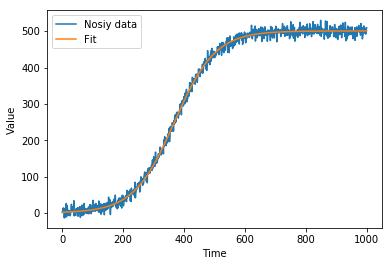

In [4]:
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as pl

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
values = model.simulate(real_parameters, times)

# Add noise
values += np.random.normal(0, 10, values.shape)

# Create an object with links to the model and time series
problem = pints.SingleSeriesProblem(model, times, values)

# Select a score function
score = pints.SumOfSquaresError(problem)

# Select some boundaries
boundaries = pints.Boundaries([0, 400], [0.03, 600])

# Perform an optimization with boundaries and hints
x0 = 0.01, 450
sigma0 = [0.01, 100]
found_parameters, found_value = pints.cmaes(
    score,
    boundaries,
    x0,
    sigma0,
    )

# Show score of true solution
print('Score at true solution: ')
print(score(real_parameters))

# Compare parameters with original
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

# Show quality of fit
pl.figure()
pl.xlabel('Time')
pl.ylabel('Value')
pl.plot(times, values, label='Nosiy data')
pl.plot(times, problem.evaluate(found_parameters), label='Fit')
pl.legend()
pl.show()